In [6]:
import wfdb as wf

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import os 
import sys

# 계산 방법
- 0. 모든 ecg data는 baseline 제거를 해야함
- 1. threshold
- 2. threshold 값 이상이면 peak start end 추출
- 3. ㄱㅏ장 큰 값  r  peak

# 장점
- 계산량 적음 
- 알고리즘 매우매우매우 단순 
- 사용자 개인별 맞춤 가능(초기의 threshold 값을 구하므로)

# 1. open

--------------------

In [7]:
path = "C:\\sebin\\lab\\ecg2\\data\\original\\01_mitbih"

In [8]:
data = path+"\\100"

In [18]:
ecg = wf.rdsamp(data,channels=[0])
ann = wf.rdann(data,extension="atr")

In [19]:
ecg

(array([[-0.145],
        [-0.145],
        [-0.145],
        ...,
        [-0.675],
        [-0.765],
        [-1.28 ]]),
 {'fs': 360,
  'sig_len': 650000,
  'n_sig': 1,
  'base_date': None,
  'base_time': None,
  'units': ['mV'],
  'sig_name': ['MLII'],
  'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal']})

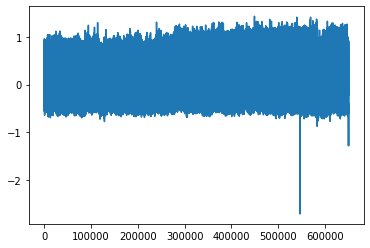

In [21]:
plt.plot(ecg[0])

# 2. threshold

----------------------------------

## 1. X
- threshold = ecg**ecg 후 10초간의 평균
- threshold < value -> start 
- threshold > vlaue -> end




In [28]:
threshold_original = ecg[0][0:360*10]

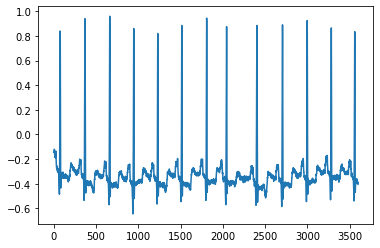

In [29]:
plt.plot(threshold_original)

In [30]:
threshold_sum = threshold_original **2

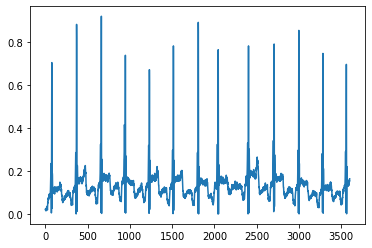

In [31]:
plt.plot(threshold_sum)

In [32]:
threshold = np.mean(threshold_sum)

In [33]:
threshold

0.131326125

In [34]:
threshold_plot = np.full((3600),threshold)

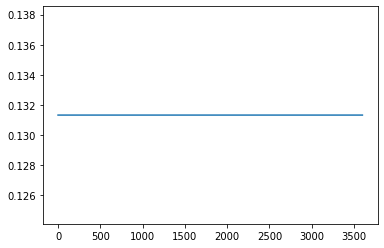

In [35]:
plt.plot(threshold_plot)

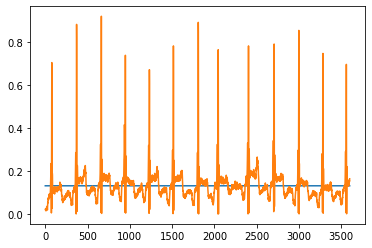

In [37]:
plt.plot(threshold_plot)
plt.plot(threshold_sum)

----------------

In [40]:
mode = 0
duration = []

In [41]:
for i in range(3600):
    if mode == 0:
        if(threshold_sum[i]>threshold):
            start = i
            mode = 1
    if mode == 1:
        if(threshold_sum[i]<threshold):
            end  = i
            duration.append([start,end])
            mode = 0
            

In [43]:
duration

[[63, 70],
 [74, 80],
 [82, 86],
 [170, 171],
 [172, 175],
 [178, 182],
 [184, 186],
 [353, 354],
 [355, 363],
 [367, 374],
 [377, 484],
 [485, 486],
 [629, 630],
 [634, 644],
 [645, 657],
 [660, 666],
 [668, 768],
 [821, 822],
 [827, 829],
 [832, 835],
 [836, 837],
 [838, 842],
 [845, 847],
 [851, 852],
 [856, 858],
 [863, 864],
 [905, 941],
 [944, 950],
 [952, 1049],
 [1127, 1128],
 [1138, 1139],
 [1198, 1208],
 [1209, 1212],
 [1215, 1225],
 [1229, 1234],
 [1236, 1343],
 [1486, 1487],
 [1488, 1489],
 [1492, 1493],
 [1498, 1509],
 [1513, 1518],
 [1520, 1626],
 [1793, 1803],
 [1807, 1813],
 [1815, 1819],
 [1821, 1891],
 [1892, 1915],
 [1916, 1920],
 [2003, 2004],
 [2007, 2015],
 [2020, 2021],
 [2026, 2038],
 [2042, 2048],
 [2050, 2159],
 [2205, 2207],
 [2212, 2213],
 [2217, 2218],
 [2224, 2225],
 [2236, 2237],
 [2242, 2244],
 [2246, 2251],
 [2260, 2262],
 [2264, 2274],
 [2277, 2279],
 [2290, 2291],
 [2295, 2298],
 [2301, 2305],
 [2316, 2317],
 [2362, 2370],
 [2371, 2396],
 [2400, 2406]

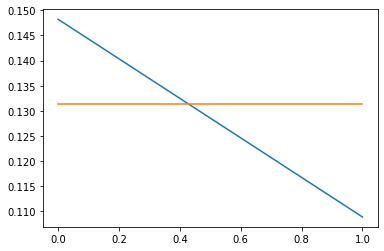

In [47]:
plt.plot(threshold_sum[duration[0]])
plt.plot(threshold_plot[duration[0]])

## 2. x
- threshold1 -> 첫번쨰 방식의 threshold 
- threshold2 -> threshhold1 < value 만 평균 

- start end 같음

In [59]:
threshold_sum = threshold_sum.reshape(-1)

In [61]:
threshold_sum

array([0.021025, 0.021025, 0.021025, ..., 0.1521  , 0.16    , 0.164025])

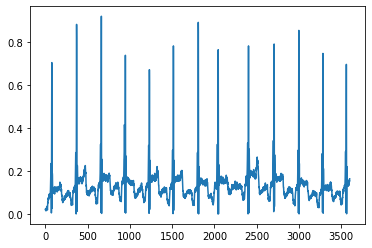

In [62]:
plt.plot(threshold_sum)

In [63]:
threshold_original

array([[-0.145],
       [-0.145],
       [-0.145],
       ...,
       [-0.39 ],
       [-0.4  ],
       [-0.405]])

In [64]:
threshold_original.reshape(-1)

array([-0.145, -0.145, -0.145, ..., -0.39 , -0.4  , -0.405])

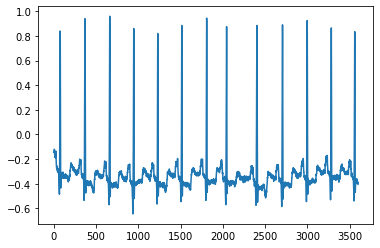

In [65]:
plt.plot(threshold_original)

In [66]:
threshold1 = threshold

In [67]:
sums = []

In [68]:
for i in range(len(threshold_sum)):
    if(threshold_sum[i]>threshold1):
        sums.append(threshold_sum[i])

In [73]:
sums

[0.148225,
 0.148225,
 0.16402500000000003,
 0.20702500000000001,
 0.235225,
 0.235225,
 0.18062499999999998,
 0.140625,
 0.3844,
 0.6084,
 0.7055999999999999,
 0.585225,
 0.27040000000000003,
 0.13322499999999998,
 0.189225,
 0.18062499999999998,
 0.1369,
 0.13322499999999998,
 0.1369,
 0.148225,
 0.1369,
 0.140625,
 0.140625,
 0.13322499999999998,
 0.13322499999999998,
 0.13322499999999998,
 0.1369,
 0.13322499999999998,
 0.1444,
 0.18062499999999998,
 0.198025,
 0.225625,
 0.2601,
 0.286225,
 0.255025,
 0.172225,
 0.24009999999999998,
 0.5184,
 0.765625,
 0.8835999999999999,
 0.819025,
 0.570025,
 0.24009999999999998,
 0.1521,
 0.2025,
 0.225625,
 0.20702500000000001,
 0.18062499999999998,
 0.1521,
 0.1521,
 0.148225,
 0.1521,
 0.1444,
 0.1444,
 0.1444,
 0.15602500000000002,
 0.148225,
 0.148225,
 0.148225,
 0.140625,
 0.15602500000000002,
 0.16809999999999997,
 0.16809999999999997,
 0.16000000000000003,
 0.15602500000000002,
 0.1521,
 0.16402500000000003,
 0.15602500000000002,
 0.1

In [74]:
len(sums)

1486

In [71]:
threshold2 = np.average(sums)

In [77]:
threshold1_plot = np.full(3600,threshold1)
threshold2_plot = np.full(3600,threshold2)

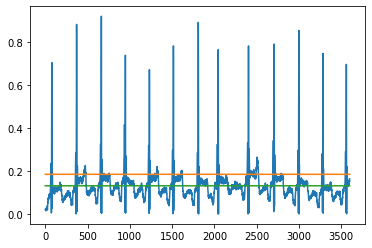

In [78]:
plt.plot(threshold_sum)
plt.plot(threshold2_plot)
plt.plot(threshold1_plot)

In [94]:
mode = 0
duration2 =[]

In [95]:
for i in range(3600):
    if mode == 0:
        if(threshold_sum[i]>threshold2):
            start = i
            mode = 1
    if mode == 1:
        if(threshold_sum[i]<threshold2):
            end  = i
            duration2.append([start,end])
            mode = 0
            

In [96]:
duration2

[[66, 69],
 [75, 80],
 [83, 84],
 [357, 362],
 [367, 374],
 [378, 381],
 [455, 458],
 [459, 480],
 [649, 656],
 [661, 666],
 [668, 671],
 [695, 696],
 [701, 702],
 [754, 757],
 [929, 940],
 [945, 950],
 [952, 955],
 [1218, 1225],
 [1229, 1234],
 [1237, 1240],
 [1294, 1295],
 [1317, 1327],
 [1328, 1333],
 [1502, 1508],
 [1513, 1518],
 [1521, 1524],
 [1605, 1621],
 [1796, 1802],
 [1807, 1813],
 [1815, 1817],
 [2030, 2038],
 [2042, 2047],
 [2050, 2052],
 [2386, 2395],
 [2400, 2406],
 [2410, 2418],
 [2425, 2436],
 [2437, 2439],
 [2440, 2449],
 [2450, 2453],
 [2454, 2455],
 [2456, 2461],
 [2463, 2473],
 [2483, 2484],
 [2488, 2489],
 [2492, 2521],
 [2692, 2699],
 [2704, 2709],
 [2711, 2716],
 [2723, 2724],
 [2728, 2729],
 [2788, 2789],
 [2794, 2795],
 [2806, 2807],
 [2985, 2991],
 [2996, 3001],
 [3003, 3005],
 [3271, 3276],
 [3281, 3286],
 [3288, 3290],
 [3548, 3553],
 [3558, 3562],
 [3566, 3569]]

In [97]:
len(duration2)

63

(0.0, 3600.0)

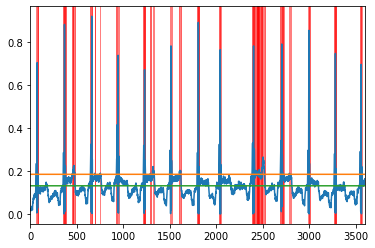

In [136]:
x = 360*10
peak_len = 0
plt.plot(threshold_sum)
plt.plot(threshold2_plot)
plt.plot(threshold1_plot)
for i in duration2:
    if(i[0]>x):
        break
    else:
        peak_len+=1
        plt.axvspan(i[0], i[1], color='red', alpha=0.5)
plt.xlim([0,x])

In [104]:
peak_len

17

In [106]:
print(duration2)

[[66, 69], [75, 80], [83, 84], [357, 362], [367, 374], [378, 381], [455, 458], [459, 480], [649, 656], [661, 666], [668, 671], [695, 696], [701, 702], [754, 757], [929, 940], [945, 950], [952, 955], [1218, 1225], [1229, 1234], [1237, 1240], [1294, 1295], [1317, 1327], [1328, 1333], [1502, 1508], [1513, 1518], [1521, 1524], [1605, 1621], [1796, 1802], [1807, 1813], [1815, 1817], [2030, 2038], [2042, 2047], [2050, 2052], [2386, 2395], [2400, 2406], [2410, 2418], [2425, 2436], [2437, 2439], [2440, 2449], [2450, 2453], [2454, 2455], [2456, 2461], [2463, 2473], [2483, 2484], [2488, 2489], [2492, 2521], [2692, 2699], [2704, 2709], [2711, 2716], [2723, 2724], [2728, 2729], [2788, 2789], [2794, 2795], [2806, 2807], [2985, 2991], [2996, 3001], [3003, 3005], [3271, 3276], [3281, 3286], [3288, 3290], [3548, 3553], [3558, 3562], [3566, 3569]]


## 3. O
- threshold3 =  threshold2 *2 

In [112]:
threshold3 = threshold2 * 2 

In [115]:
threshold3_plot = np.full(3600,threshold3)

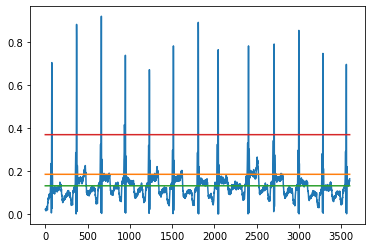

In [116]:
plt.plot(threshold_sum)
plt.plot(threshold2_plot)
plt.plot(threshold1_plot)
plt.plot(threshold3_plot)

In [130]:
mode = 0 
duration3 =[]

In [131]:
for i in range(3600):
    if mode == 0:
        if(threshold_sum[i]>threshold3):
            start = i
            mode = 1
    if mode == 1:
        if(threshold_sum[i]<threshold3):
            end  = i
            duration3.append([start,end])
            mode = 0
            

In [132]:
duration3

[[75, 79],
 [368, 373],
 [661, 665],
 [936, 938],
 [945, 949],
 [1230, 1233],
 [1514, 1517],
 [1808, 1812],
 [2043, 2047],
 [2401, 2405],
 [2705, 2708],
 [2996, 3000],
 [3281, 3285],
 [3558, 3562]]

In [133]:
len(duration3)

14

(0.0, 3600.0)

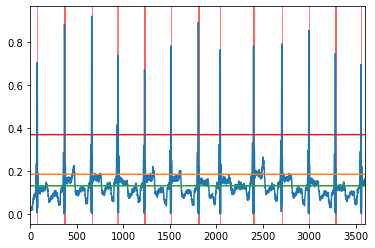

In [138]:
x = 360*10
peak_len = 0
plt.plot(threshold_sum)
plt.plot(threshold1_plot)
plt.plot(threshold2_plot)
plt.plot(threshold3_plot)
for i in duration3:
    if(i[0]>x):
        break
    else:
        peak_len+=1
        plt.axvspan(i[0], i[1], color='red', alpha=0.5)
plt.xlim([0,x])

In [139]:
peak_len

14

# + 함수화

In [228]:
'''
input 
path  = path+"\\" +name
mitbih data path

output
ecg
ann[2]  0/point 1/annotation

ecg_square  :
threshold 
peak_duration
'''

def getPeakDuration(path):
    print(path)
    ecg = wf.rdsamp(path,channels=[0])
    ann = wf.rdann(path,extension="atr")
    
    original = ecg[0].reshape(-1)
    square = original ** 2

    #threshold 구하기 
    threshold_original = ecg[0][0:360*10]
    threshold_square = threshold_original **2
    #1
    threshold1 = np.mean(threshold_square)
    threshold1_plot = np.full((3600),threshold1)
    #2
    sums = []
    for i in range(len(threshold_square)):
        if(threshold_square[i]>threshold1):
            sums.append(threshold_square[i])
    threshold2 = np.average(sums)
    threshold2_plot = np.full(3600,threshold2)
    #3
    threshold3 = threshold2 * 2 
    threshold3_plot = np.full(3600,threshold3)

    print(threshold3)



    mode = 0 
    duration =[]
    for i in range(3600):
        if mode == 0:
            if(threshold_square[i]>threshold3):
                start = i
                mode = 1
        if mode == 1:
            if(threshold_square[i]<threshold3):
                end  = i
                duration.append([start,end])
                mode = 0

    plt.cla()
    plt.plot(threshold_square)
    plt.plot(threshold1_plot)
    plt.plot(threshold2_plot)
    plt.plot(threshold3_plot)
    for i in duration:
        plt.axvspan(i[0], i[1], color='red', alpha=0.5)



    plt.xlim([0,x])
    plt.show()
            

    ecg = original
    ann = [ann.sample,ann.symbol]
    ecg_square = square
    threshold = [threshold1,threshold2,threshold3]
    peak_duration = duration

    return ecg,ann ,ecg_square ,threshold, peak_duration 

C:\sebin\lab\ecg2\data\original\01_mitbih\101
0.4479882243684993


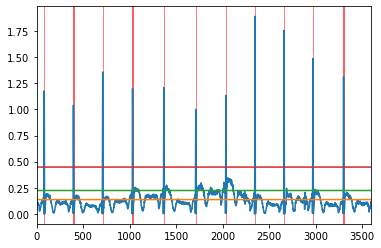

In [227]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\101")

# 3. 적용 

### 1. 단순 
- 100 ann
- 99퍼 이상

In [141]:
original = ecg[0]

In [143]:
square = original ** 2

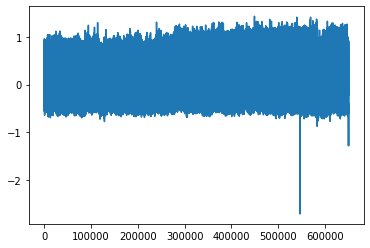

In [146]:
plt.plot(original)

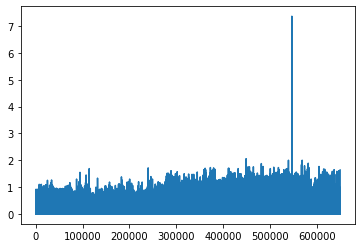

In [147]:
plt.plot(square)

(0.0, 3600.0)

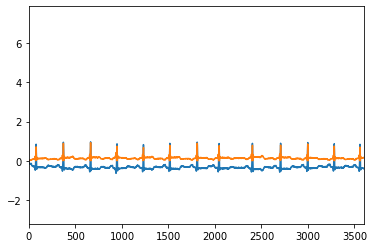

In [151]:
plt.plot(original)
plt.plot(square)
plt.xlim([0,10*360])

In [154]:
duration_all = []

In [155]:
for i in range(len(original)):
    if mode == 0:
        if(square[i]>threshold3):
            start = i
            mode = 1
    if mode == 1:
        if(square[i]<threshold3):
            end  = i
            duration_all.append([start,end])
            mode = 0
            

In [156]:
duration_all

[[75, 79],
 [368, 373],
 [661, 665],
 [936, 938],
 [945, 949],
 [1230, 1233],
 [1514, 1517],
 [1808, 1812],
 [2043, 2047],
 [2401, 2405],
 [2705, 2708],
 [2996, 3000],
 [3281, 3285],
 [3558, 3562],
 [3861, 3865],
 [4169, 4173],
 [4465, 4468],
 [4763, 4767],
 [5059, 5063],
 [5345, 5349],
 [5631, 5637],
 [5917, 5921],
 [6212, 6217],
 [6525, 6529],
 [6822, 6826],
 [7104, 7108],
 [7389, 7395],
 [7668, 7672],
 [7951, 7955],
 [8234, 8236],
 [8244, 8249],
 [8529, 8532],
 [8538, 8541],
 [8825, 8830],
 [8837, 8839],
 [8844, 8845],
 [9131, 9134],
 [9140, 9144],
 [9149, 9150],
 [9429, 9435],
 [9709, 9713],
 [9987, 9990],
 [9997, 10000],
 [10272, 10274],
 [10281, 10285],
 [10580, 10583],
 [10589, 10594],
 [10884, 10886],
 [10893, 10897],
 [11182, 11184],
 [11190, 11193],
 [11471, 11472],
 [11479, 11483],
 [11779, 11784],
 [12058, 12059],
 [12065, 12068],
 [12337, 12340],
 [12349, 12353],
 [12634, 12637],
 [12644, 12647],
 [12939, 12941],
 [12948, 12952],
 [13251, 13256],
 [13265, 13269],
 [13553, 

In [157]:
len(duration_all)

2771

In [163]:
ann.sample

array([    18,     77,    370, ..., 649484, 649734, 649991])

In [165]:
ann.symbol

['+',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'A',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N'

In [167]:
len(ann.sample)

2274

### 2. 이상

C:\sebin\lab\ecg2\data\original\01_mitbih\102
0.24820021082220659


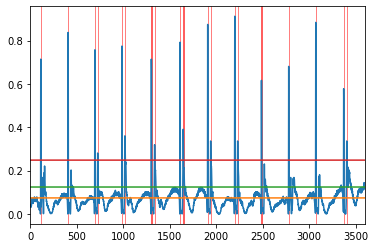

In [229]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\102")

C:\sebin\lab\ecg2\data\original\01_mitbih\103
0.792081668625147


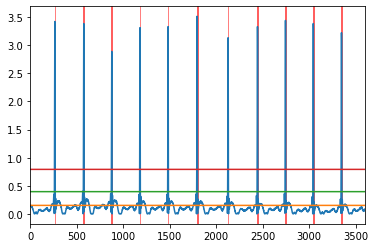

In [230]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\103")

> error
+ 몇초안에 안나오면 밑에 threshold로 하는것도...

C:\sebin\lab\ecg2\data\original\01_mitbih\104
0.9787290028089888


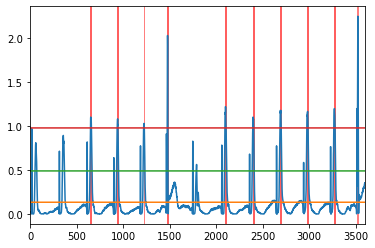

In [231]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\104")

C:\sebin\lab\ecg2\data\original\01_mitbih\105
0.6627910065237651


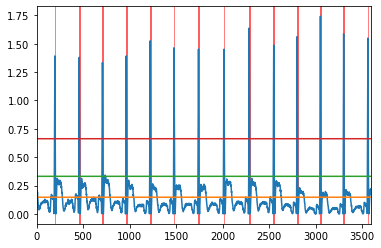

In [232]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\105")

C:\sebin\lab\ecg2\data\original\01_mitbih\106
1.0893291826309066


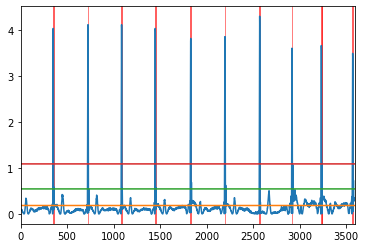

In [233]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\106")

C:\sebin\lab\ecg2\data\original\01_mitbih\107
6.030741711590296


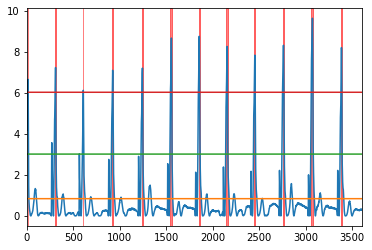

In [234]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\107")

C:\sebin\lab\ecg2\data\original\01_mitbih\108
0.5380691832858499


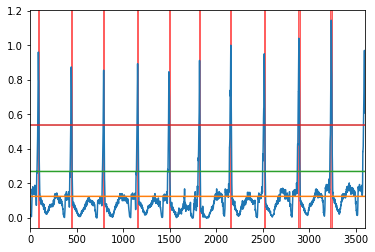

In [235]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\108")

C:\sebin\lab\ecg2\data\original\01_mitbih\109
1.2727724736048267


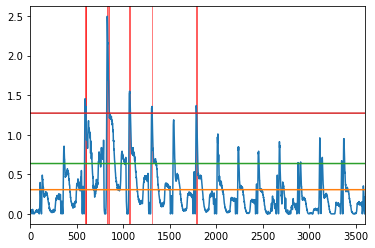

In [236]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\109")

C:\sebin\lab\ecg2\data\original\01_mitbih\111
0.25648607540702656


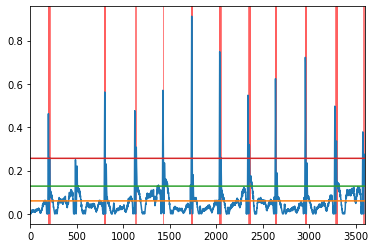

In [238]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\111")

> error!

C:\sebin\lab\ecg2\data\original\01_mitbih\112
2.2466788427299704


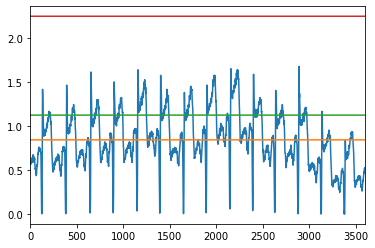

In [239]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\112")

C:\sebin\lab\ecg2\data\original\01_mitbih\113
1.1273929611650486


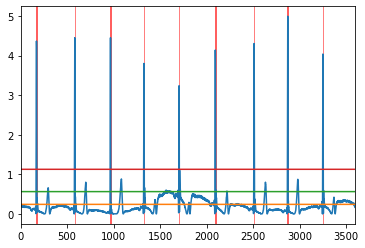

In [240]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\113")

C:\sebin\lab\ecg2\data\original\01_mitbih\114
0.16480973063973064


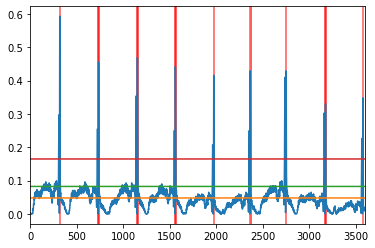

In [241]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\114")

C:\sebin\lab\ecg2\data\original\01_mitbih\115
0.9691010989010989


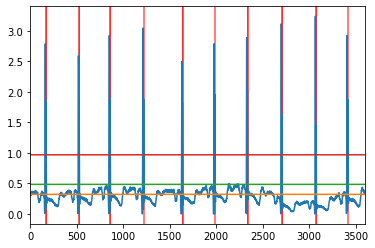

In [242]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\115")

C:\sebin\lab\ecg2\data\original\01_mitbih\116
3.5623789572192512


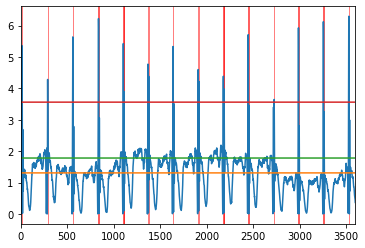

In [243]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\116")

C:\sebin\lab\ecg2\data\original\01_mitbih\117
1.9289629145259224


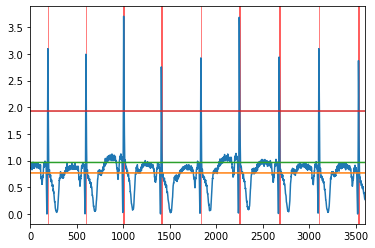

In [244]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\117")

C:\sebin\lab\ecg2\data\original\01_mitbih\118
3.7558911402789175


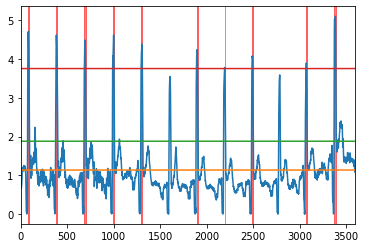

In [245]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\118")

> error

C:\sebin\lab\ecg2\data\original\01_mitbih\119
2.964036671987231


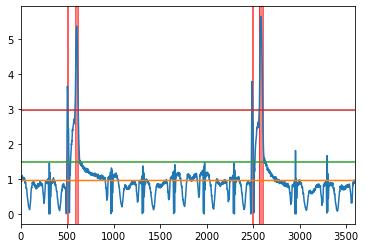

In [246]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\119")

> error

C:\sebin\lab\ecg2\data\original\01_mitbih\121
1.6128595922634605


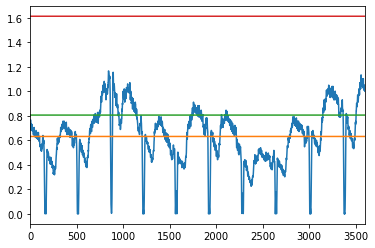

In [248]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\121")

>error 

C:\sebin\lab\ecg2\data\original\01_mitbih\122
1.9035428848955804


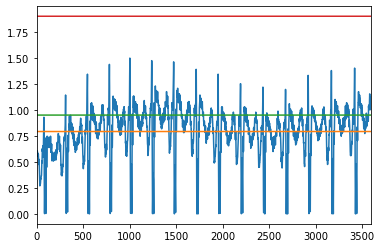

In [249]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\122")

C:\sebin\lab\ecg2\data\original\01_mitbih\123
1.9644558966861598


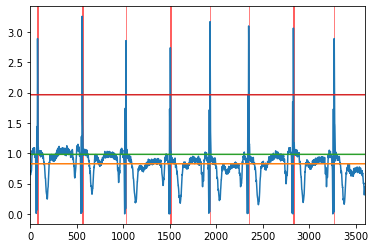

In [250]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\123")

> error

C:\sebin\lab\ecg2\data\original\01_mitbih\124
2.045250495626822


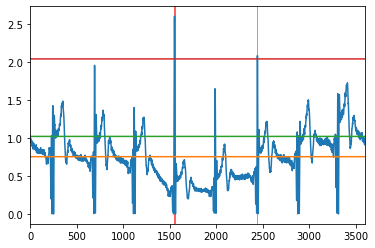

In [251]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\124")

C:\sebin\lab\ecg2\data\original\01_mitbih\200
2.1891261363636367


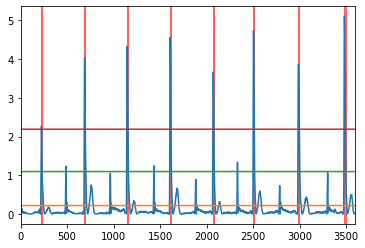

In [254]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\200")

C:\sebin\lab\ecg2\data\original\01_mitbih\201
0.2631229898516784


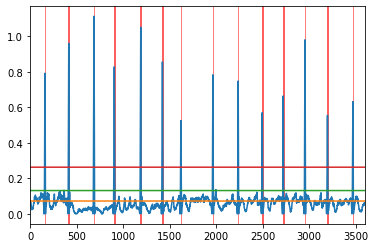

In [255]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\201")

C:\sebin\lab\ecg2\data\original\01_mitbih\202
1.0027911764705884


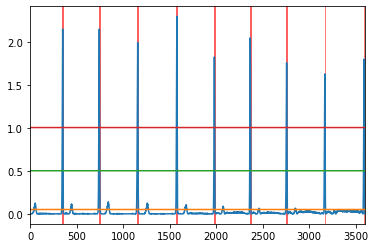

In [256]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\202")

> error

C:\sebin\lab\ecg2\data\original\01_mitbih\203
1.436604081632653


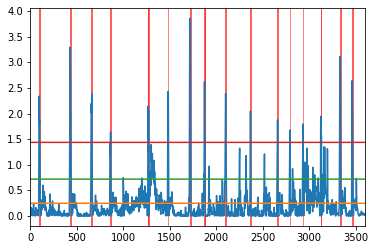

In [257]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\203")

C:\sebin\lab\ecg2\data\original\01_mitbih\205
0.44214050029779633


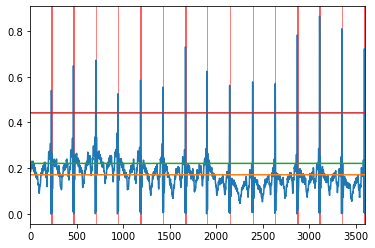

In [259]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\205")

> error

C:\sebin\lab\ecg2\data\original\01_mitbih\207
1.1212225874125874


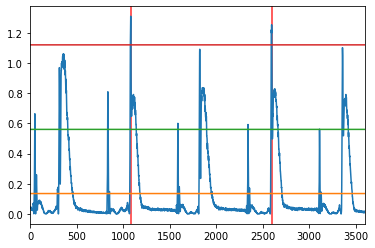

In [261]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\207")

C:\sebin\lab\ecg2\data\original\01_mitbih\208
1.8348910876132933


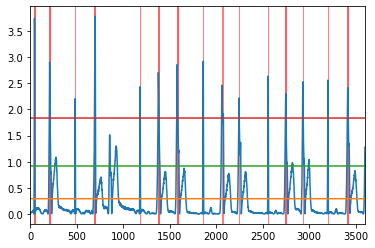

In [262]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\208")

C:\sebin\lab\ecg2\data\original\01_mitbih\209
0.5386663333333332


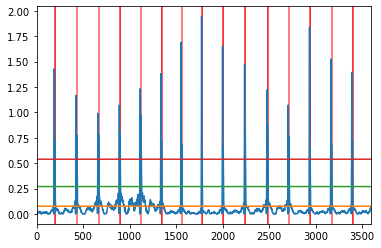

In [263]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\209")

C:\sebin\lab\ecg2\data\original\01_mitbih\210
0.4590082456140351


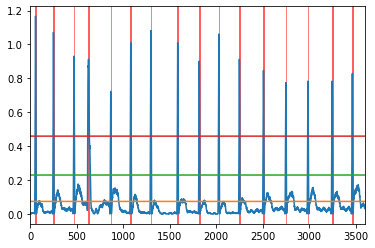

In [264]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\210")

C:\sebin\lab\ecg2\data\original\01_mitbih\212
0.840909635974304


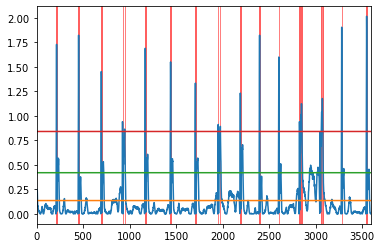

In [265]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\212")

C:\sebin\lab\ecg2\data\original\01_mitbih\213
2.3642147560975606


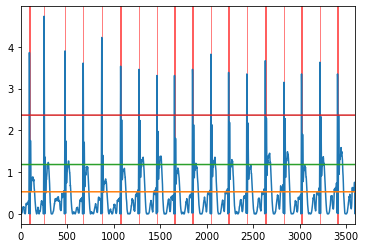

In [266]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\213")

C:\sebin\lab\ecg2\data\original\01_mitbih\214
1.9475770547945204


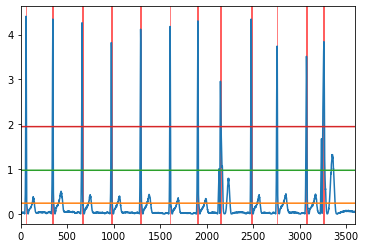

In [267]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\214")

C:\sebin\lab\ecg2\data\original\01_mitbih\215
0.3845614678899082


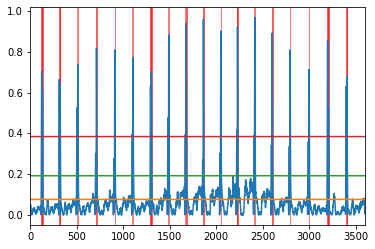

In [268]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\215")

> error?

C:\sebin\lab\ecg2\data\original\01_mitbih\217
2.7481630214917825


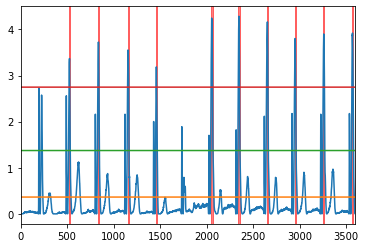

In [270]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\217")

C:\sebin\lab\ecg2\data\original\01_mitbih\219
2.1442004564315353


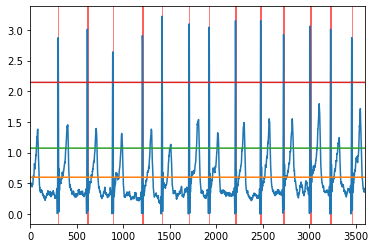

In [272]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\219")

C:\sebin\lab\ecg2\data\original\01_mitbih\220
1.3337688044338873


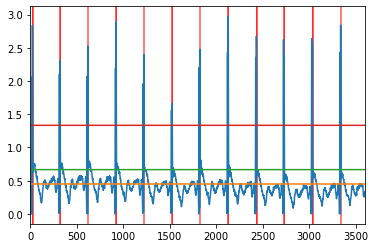

In [273]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\220")

C:\sebin\lab\ecg2\data\original\01_mitbih\221
1.1677023913043478


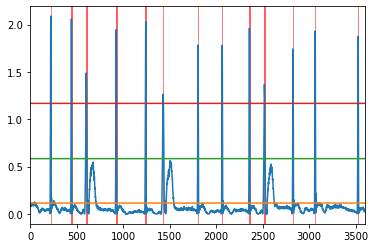

In [274]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\221")

C:\sebin\lab\ecg2\data\original\01_mitbih\222
0.2414984184914842


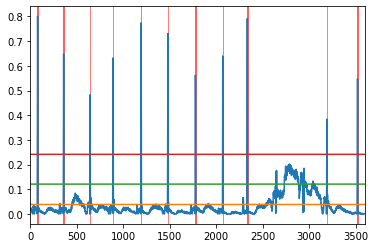

In [275]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\222")

C:\sebin\lab\ecg2\data\original\01_mitbih\223
1.4161050505050503


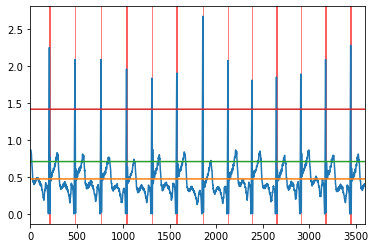

In [276]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\223")

> error

C:\sebin\lab\ecg2\data\original\01_mitbih\228
0.34016330669944683


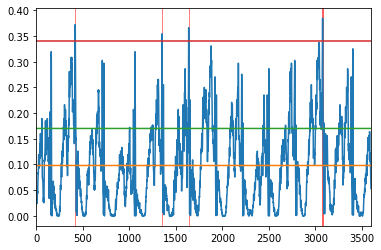

In [277]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\228")

C:\sebin\lab\ecg2\data\original\01_mitbih\230
1.2268337027379401


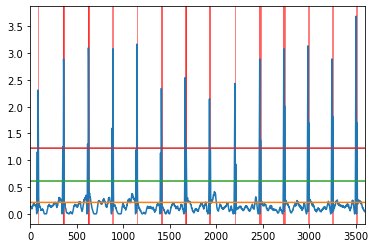

In [278]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\230")

C:\sebin\lab\ecg2\data\original\01_mitbih\231
0.9585786138613861


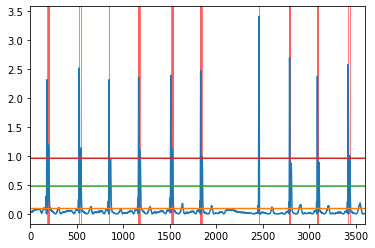

In [279]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\231")

> error : noise

C:\sebin\lab\ecg2\data\original\01_mitbih\232
0.18055966076696162


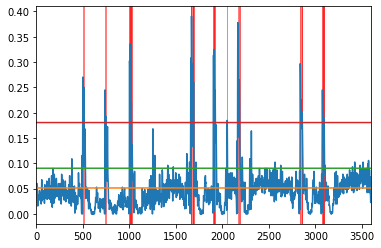

In [280]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\232")

> error ? 

C:\sebin\lab\ecg2\data\original\01_mitbih\233
2.4068912324649303


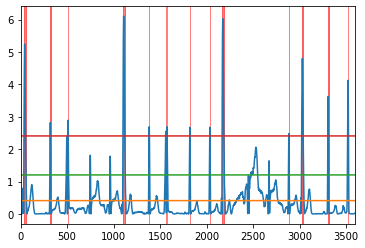

In [281]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\233")

C:\sebin\lab\ecg2\data\original\01_mitbih\234
0.9552108318890815


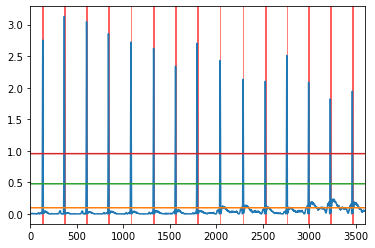

In [282]:
ecg , ann , ecg_square , threshold , peak_duration = getPeakDuration(path+"\\234")